In [1]:
from plots import *
import scipy.io
import numpy as np
%load_ext autoreload
%autoreload 2


c:\Users\Bruker\anaconda3\envs\SAXSTT\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Bruker\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


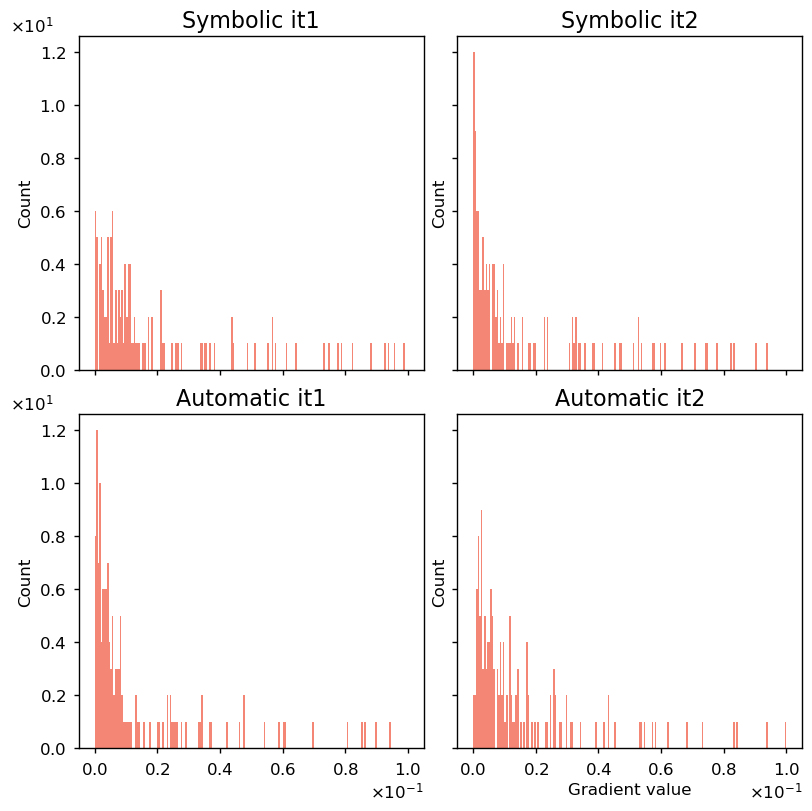

In [26]:
filenames = [r"current_opt_saxs_0_it1.mat", r"current_opt_saxs_0_it2.mat", "current_opt_saxs_1_it1.mat", "current_opt_saxs_1_it2.mat"]
paths = [r"../Data sets/Debug Data/" + name  for name in filenames]
keys = ["grad_a", "grad_a", "grad_a", "grad_a"]
titles = ["Symbolic it1", "Symbolic it2", "Automatic it1", "Automatic it2"]

plot_visualisation_grads(paths, keys, titles, range = (1e-9, 0.1))



In [3]:
"""if np.any( mat_dict_old[keys[-1]] != mat_dict_new[keys[1]]) :
    print("A difference!")
else:
    print("Identical!")


print(test_mat.keys())"""

dict_keys(['__header__', '__version__', '__globals__', 'grad_a', 'e', 'a_tomo'])


In [22]:

sym_it1 = scipy.io.loadmat(r"../Data sets/Debug Data/grad_coeffs_0_it1.mat")
auto_it1 = scipy.io.loadmat(r"../Data sets/Debug Data/grad_coeffs_1_it1.mat")

print(sym_it1["grad_a"].shape)

(4, 4, 4, 4)


(array([  2.,   1.,   8.,  41., 180.,  14.,   5.,   3.,   1.,   1.]),
 array([-0.4661217 , -0.35546562, -0.24480954, -0.13415346, -0.02349738,
         0.0871587 ,  0.19781478,  0.30847086,  0.41912694,  0.52978302,
         0.6404391 ]),
 <BarContainer object of 10 artists>)

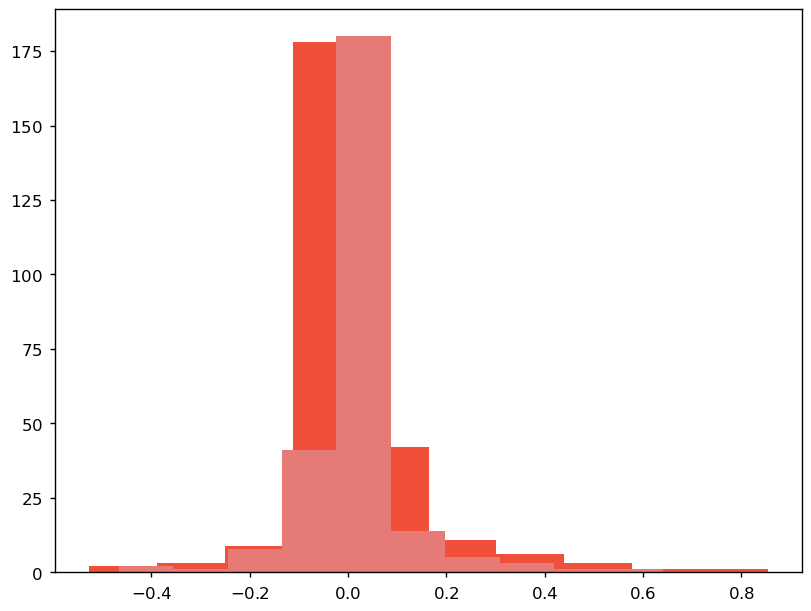

In [24]:
import matplotlib.pyplot as plt

plt.hist(np.reshape(sym_it1["grad_a"], -1) )
plt.hist(np.reshape(auto_it1["grad_a"], -1) )

In [15]:
diff = np.abs(sym_it1[keys[0]] - auto_it1[keys[-1]] )

print(diff[diff > 1e-15])

[2.45161453e-02 6.73916255e-02 2.40662357e-01 9.54120576e-02
 2.02036616e-01 2.71981338e-01 1.20147178e-01 3.39228569e-01
 1.35185640e-03 3.10578915e-01 4.71487455e-03 8.60085917e-01
 2.79311008e-03 7.02507572e-04 6.02516166e-03 5.16499427e-03
 3.57861395e-02 4.18869436e-03 1.69612159e-02 1.04187116e-02
 2.03551603e-01 1.07579334e-01 1.38667457e-01 3.30112876e-01
 6.92395858e-01 7.48382892e-03 1.04009878e-01 1.26232206e-01
 1.39677052e-01 1.69749789e-03 1.15437544e-02 1.19809642e-02
 2.62757871e-03 5.75025892e-03 1.50402850e-02 1.42549994e-02
 2.38703060e-01 8.45683788e-03 4.40068959e-02 1.10555810e-03
 1.48021213e-01 2.20940606e-02 4.01618133e-01 2.67488268e-02
 2.44274193e-01 1.65392692e-02 2.92260402e-01 9.85934169e-02
 5.60708982e-01 8.03738814e-02 2.50890599e-01 4.69958668e-01
 2.33522913e-03 4.05636977e-02 5.04727142e-03 8.35394345e-02
 2.99566603e-02 1.38188568e-01 3.59831857e-01 4.60508086e-02
 9.36959675e-03 2.82508451e-01 3.92540962e-02 2.06161744e-01
 6.87846092e-03 6.909941

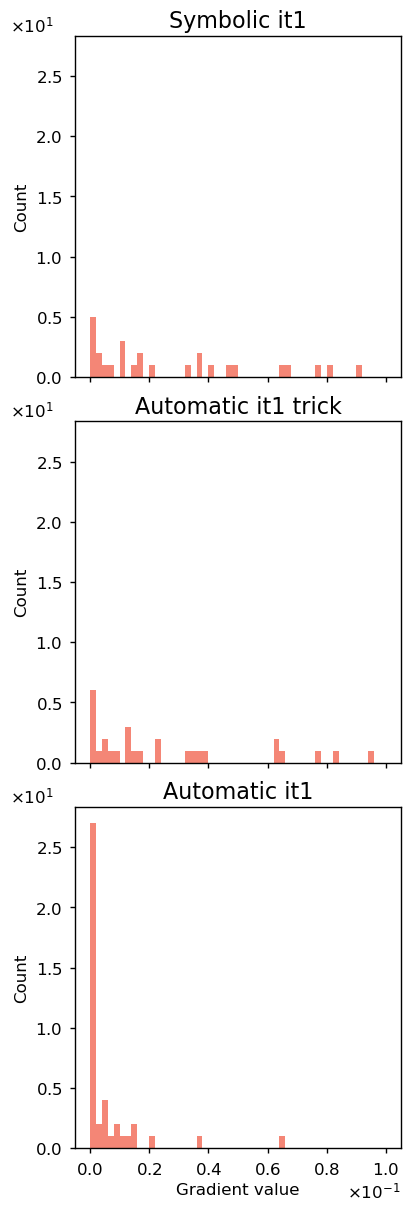

In [31]:
filenames = [r"grad_phi_0_it1.mat", r"grad_phi_1_it1_works.mat", "grad_phi_1_it1_issue.mat"]
paths = [r"../Data sets/Debug Data/" + name  for name in filenames]
keys = ["grad_phi_struct", "grad_phi_struct", "grad_phi_struct"]
titles = ["Symbolic it1", "Automatic it1 trick", "Automatic it1"]

plot_visualisation_grads(paths, keys, titles, range = (1e-9, 0.1), bins = 50)

# Note that case 1 and 2 start with the same a-params. They differ slightly. 
# Case 3 starts off differently, and in this case with a lower error from 1, but a higher it1 error. 
# Vanishing gradient problem in case 3

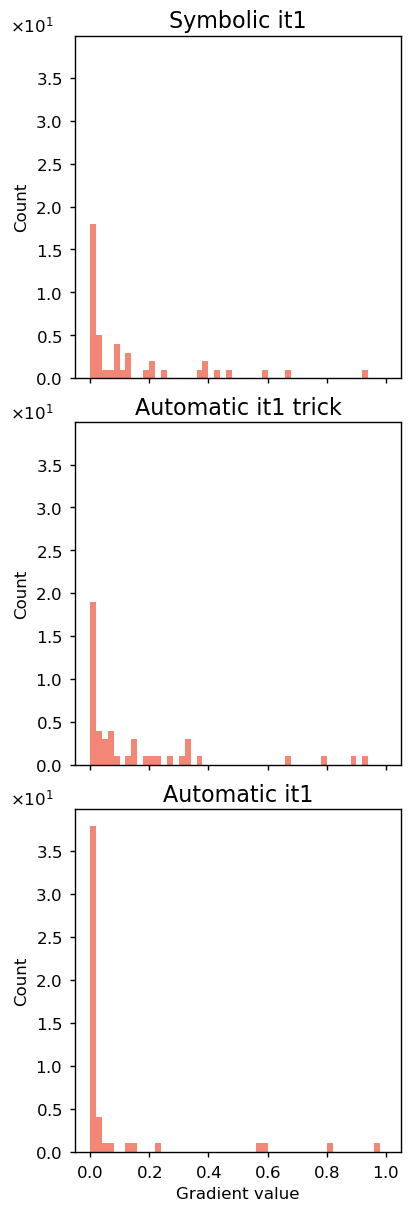

In [35]:
filenames = [r"grad_theta_0_it1.mat", r"grad_theta_1_it1_works.mat", "grad_theta_1_it1_issue.mat"]
paths = [r"../Data sets/Debug Data/" + name  for name in filenames]
keys = ["grad_theta_struct", "grad_theta_struct", "grad_theta_struct"]
titles = ["Symbolic it1", "Automatic it1 trick", "Automatic it1"]

plot_visualisation_grads(paths, keys, titles, range = (1e-9, 1), bins = 50)